In [1]:
import pandas as pd

In [2]:
ds=pd.read_csv("./Iris-HF/iris.csv", index_col="Id")

In [3]:
ds

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,,,,,
1,5.1,3.5,1.4,0.2,Iris-setosa
2,4.9,3.0,1.4,0.2,Iris-setosa
3,4.7,3.2,1.3,0.2,Iris-setosa
4,4.6,3.1,1.5,0.2,Iris-setosa
5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
146,6.7,3.0,5.2,2.3,Iris-virginica
147,6.3,2.5,5.0,1.9,Iris-virginica
148,6.5,3.0,5.2,2.0,Iris-virginica


In [4]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
Index: 150 entries, 1 to 150
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 7.0+ KB


In [5]:
ds.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

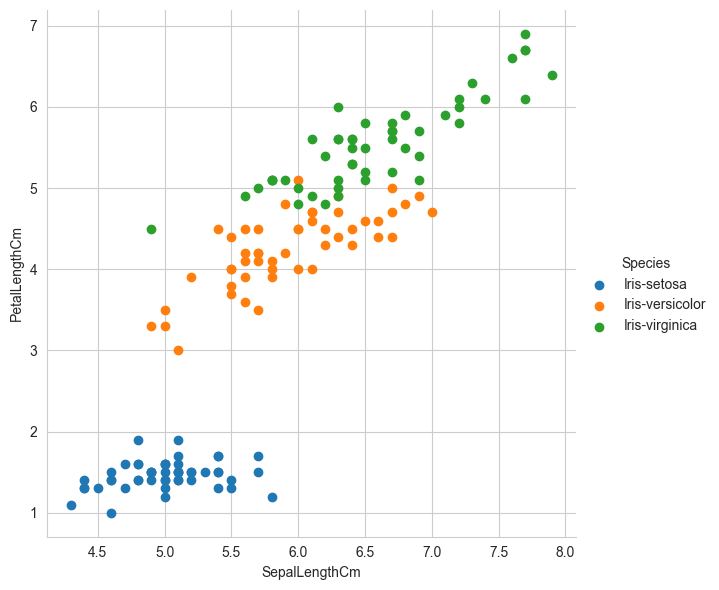

In [7]:
sns.set_style("whitegrid")
sns.FacetGrid(ds, hue ="Species",height=6).map(plt.scatter,'SepalLengthCm','PetalLengthCm').add_legend()

In [8]:
# Splitting the Dataset :
X=ds.iloc[:,:-1]
Y=ds.iloc[:,-1]

In [9]:
# Encoding the target Dataset :
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
Y=le.fit_transform(Y)

In [10]:
# Y.ndim
# Dimensoins of  target Column:
Y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [11]:
# We Can see that :
# 0 to Iris-setosa
# 1 to Iris-versicolor
# 2 to Iris-verginica

In [12]:
# Separating the Taining and Testing Data .
from sklearn.model_selection import train_test_split
X_train, X_test,y_train,y_test = train_test_split(X,Y,random_state=0,test_size=0.2)

In [13]:
X_test.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
Id,,,,
115,5.8,2.8,5.1,2.4
63,6.0,2.2,4.0,1.0
34,5.5,4.2,1.4,0.2
108,7.3,2.9,6.3,1.8
8,5.0,3.4,1.5,0.2


In [14]:
# Build the model from a pipeline to take into account the scaling of features
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

pipeline = Pipeline([
    ("scaler", StandardScaler()),
    ("clf", DecisionTreeClassifier())
])

pipeline.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('clf', DecisionTreeClassifier())])

In [15]:
Y_predict = pipeline.predict(X_test)
Y_predict= pd.Series(Y_predict)
Y_score = pipeline.score(X_test,y_test)

In [16]:
# Accuracy & Predicted Values
Y_score, Y_predict.head()

(1.0,
 0    2
 1    1
 2    0
 3    2
 4    0
 dtype: int64)

In [17]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import PrecisionRecallDisplay , RocCurveDisplay
from sklearn.metrics import ConfusionMatrixDisplay

In [18]:
print(classification_report(y_test,Y_predict))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00         6

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [19]:
# Save your model
import joblib
joblib.dump(pipeline, "models/iris_dt.joblib")

['models/iris_dt.joblib']

In [22]:
import numpy as np
import gradio as gr

def iris_identifier(sepal_length, sepal_width, petal_length, petal_width):
    input = np.array([[sepal_length, sepal_width, petal_length, petal_width]])
    prediction = pipeline.predict(input)

    if prediction == 0:
        return 'iris-setosa'
    elif prediction == 1:
        return 'Iris-versicolor'
    elif prediction == 2:
        return 'Iris-virginica'
    else:
        return "Invalid prediction"

iface = gr.Interface(fn=iris_identifier,
                     inputs=["number", "number", "number", "number"],
                     outputs="text",
                     live=True,
                     title="Iris Identifier",
                     description="Enter the four measurements to predict the Iris species.")

iface.launch(share=True)

# The **Flag** button allows users (or testers) to mark or “flag”
# a particular input-output interaction for later review.
# When someone clicks **Flag**, Gradio saves the input values (and often the output) to a log.csv file
# letting you keep track of interesting or potentially problematic cases for debugging or analysis later on

Running on local URL:  http://127.0.0.1:7861
Running on public URL: https://0be0140da8ec50bd9c.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)


C:\Users\brjap\anaconda3\envs\huggingface\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\brjap\anaconda3\envs\huggingface\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\brjap\anaconda3\envs\huggingface\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\brjap\anaconda3\envs\huggingface\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\brjap\anaconda3\envs\huggingface\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScal